In this notebook, we will use the pytorch dataloader to load a custom dataset (MNIST Digits dataset in this case) from file.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
import imageio as imo
import os

In [ ]:
# # Downloading dataset and storing in disk
# #!wget -O data.zip https: // www.dropbox.com / sh / zbtnl65mtfvhpg7 / AAD5SjeBToKkaYZ5A7gxw4yGa?dl=0
# import requests
#
# # URL of the dataset
# url = "https://www.dropbox.com/sh/zbtnl65mtfvhpg7/AAD5SjeBToKkaYZ5A7gxw4yGa?dl=1"
# # File path to save the downloaded dataset
# save_path = "data.zip"
#
# # Send a GET request to download the dataset
# response = requests.get(url)
# response.raise_for_status()
#
# # Save the dataset to disk
# with open(save_path, "wb") as f:
#     f.write(response.content)

In [ ]:
# # Extracting
# # !unzip data.zip
# # !gunzip mnist_train.tar.gz
# # !tar -xf mnist_train.tar
# #
# # !gunzip mnist_test.tar.gz
# # !tar -xf mnist_test.tar
# # Extract the zip file
# import zipfile
# import tarfile
#
# with zipfile.ZipFile("data.zip", "r") as zip_ref:
#     zip_ref.extractall()
#
# # Extract the training data
# with tarfile.open("mnist_train.tar.gz", "r:gz") as tar:
#     tar.extractall()
#
# # Extract the test data
# with tarfile.open("mnist_test.tar.gz", "r:gz") as tar:
#     tar.extractall()

In [ ]:
# !ls test /

directory = "test"

# List the contents of the directory
files = os.listdir(directory)

# Print the file names
for file in files:
    print(file)

In [3]:
import numpy as np
from PIL import Image


def read_images(directory):
    # List the image files in the directory
    files = [file for file in os.listdir(directory) if file.endswith(".jpg") or file.endswith(".png")]

    # Initialize an empty list to store the images as arrays
    images = []
    labels = []

    # Read each image and convert it to a NumPy array
    for file in files:
        image_path = os.path.join(directory, file)
        image = Image.open(image_path)

        image_array = np.array(image)
        print(image_array)

        images.append(image_array)
        # Extract the label from the file name
        label = int(file.split("-")[1][3:-4])
        labels.append(label)

    # Convert the list of image arrays to a NumPy array
    images_array = np.array(images)
    labels_array = np.array(labels)

    # Print the shape of the NumPy array
    return images_array, labels_array

In [4]:
trans = transforms.ToTensor()


class MyDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        # Convert the image and label to torch tensors
        #image = torch.from_numpy(image)

        image = trans(image)
        label = torch.tensor(label)

        return image, label

In [87]:
# read pngs
train_images, train_labels = read_images('train/')
test_images, test_labels = read_images('test/')


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9 121 255 255  80   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  67 253 253 253 253  20   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  14 141 253 253 253 253  20   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  34 253 253 253 253 148  10   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  34 253 253 253 253  54   0   0   0   0   

KeyboardInterrupt: 

In [5]:
# read csv
data = np.genfromtxt('mnist_train.csv', delimiter=',')
train_labels = data[:, 0]  # Extract labels from the first column
train_features = data[:, 1:]  # Extract features from remaining columns

data = np.genfromtxt('mnist_test.csv', delimiter=',')
test_labels = data[:, 0]  # Extract labels from the first column
test_features = data[:, 1:]  # Extract features from remaining columns

In [11]:
train_features = train_features.reshape(-1, 28, 28)
test_features = test_features.reshape(-1, 28, 28)

train_dataSet = MyDataset(train_features, train_labels)
test_dataSet = MyDataset(test_features, test_labels)

In [12]:
batch_size = 32
num_workers = 4
# Create the train and test data loaders
train_loader = DataLoader(train_dataSet, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataSet, batch_size=batch_size, shuffle=False, num_workers=num_workers)


torch.Size([1, 28, 28])


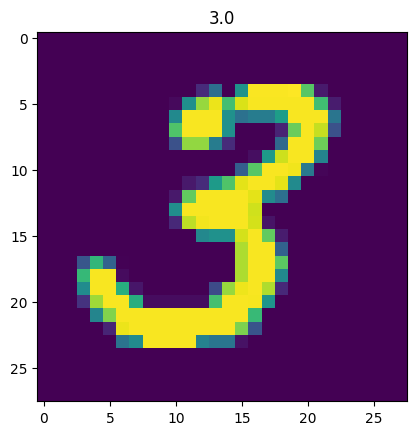

In [13]:
index = 255
image, label = train_dataSet[index]
print(image.shape)

# Display the image
plt.imshow(image.reshape(28, 28))
plt.title(label.item())
plt.show()



In [19]:
class tempTrans():
    def __init__(self, trannies):
        self.trannies = trannies

    def __call__(self, image):
        nChan, nRow, nCol = image.shape
        # Top, right, bot, left
        for i, v in enumerate(self.trannies):
            if i == 0 and v != 0:
                zeros = torch.zeros((nChan, v, nCol))
                image = torch.cat((zeros, image), dim=1)
                image = image[:, :nRow, :]
            if i == 1 and v != 0:
                zeros = torch.zeros((nChan, nRow, v))
                image = torch.cat((image, zeros), dim=2)
                image = image[:, :, v:]
            if i == 2 and v != 0:
                zeros = torch.zeros((nChan, v, nCol))
                image = torch.cat((image, zeros), dim=1)
                image = image[:, v:, :]
            if i == 3 and v != 0:
                zeros = torch.zeros((nChan, nRow, v))
                image = torch.cat((zeros, image), dim=2)
                image = image[:, :, :nCol]
        return image



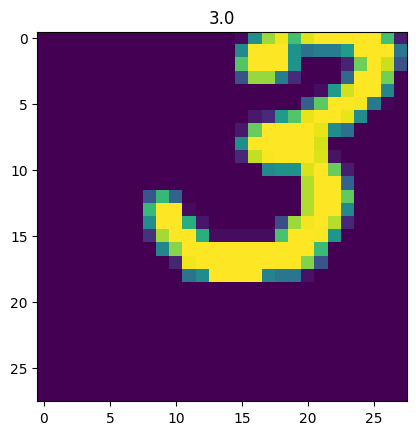

In [23]:
index = 255
image, label = train_dataSet[index]
translate = tempTrans([0, 0, 5, 5])
newImage = translate(image)
# Display the image
plt.imshow(newImage.reshape(28, 28))
plt.title(label.item())
plt.show()

